<a href="https://colab.research.google.com/github/juantoroa/GRUPO-9-MIAD-ML-NPL/blob/main/Proyecto%20RON-MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Se aplica Savitzky-Golay segunda derivada y se eliminan cuatro muestras sin resultado de MON

In [2]:
#from google.colab import files
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_excel('PROYECTO1.xlsx').iloc[:, 1:]

print("Información del Dataset:")
print(df.info())
df.describe()

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Columns: 431 entries, 3931 cm-1 to MON
dtypes: float64(431)
memory usage: 3.8 MB
None


,3931 cm-1,3933 cm-1,3934 cm-1,3936 cm-1,3938 cm-1,3940 cm-1,3942 cm-1,3944 cm-1,3946 cm-1,3948 cm-1,...,4743 cm-1,4745 cm-1,4746 cm-1,4748 cm-1,4750 cm-1,4752 cm-1,4754 cm-1,4756 cm-1,RON,MON
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,0.297362,0.298410,0.299537,0.300290,0.300622,0.300573,0.300532,0.300754,0.301050,0.301541,...,0.069817,0.069451,0.069111,0.068802,0.068533,0.068299,0.068088,0.067891,86.675722,78.565301
std,0.017940,0.018282,0.018432,0.018481,0.018445,0.018374,0.018282,0.018155,0.018070,0.018023,...,0.009529,0.009495,0.009462,0.009433,0.009408,0.009383,0.009360,0.009343,8.086765,5.687131
min,0.254513,0.254629,0.252446,0.251206,0.251260,0.252138,0.254046,0.254609,0.254776,0.256855,...,0.058026,0.057700,0.057282,0.057114,0.057065,0.056887,0.056750,0.056607,60.000000,58.800000
25%,0.285674,0.286660,0.287739,0.288435,0.288783,0.288704,0.288694,0.288896,0.289219,0.289600,...,0.066343,0.066008,0.065665,0.065383,0.065133,0.064897,0.064660,0.064432,86.200000,78.500000
50%,0.291069,0.292118,0.293121,0.293994,0.294333,0.294278,0.294339,0.294472,0.294613,0.295113,...,0.067928,0.067514,0.067084,0.066770,0.066469,0.066248,0.066021,0.065839,87.900000,79.600000
75%,0.316127,0.317476,0.320008,0.320581,0.320661,0.320505,0.319594,0.319866,0.320345,0.319991,...,0.070014,0.069630,0.069255,0.068905,0.068632,0.068366,0.068151,0.067955,90.900000,80.600000
max,0.347904,0.349397,0.350291,0.351059,0.351703,0.352137,0.352673,0.352723,0.352904,0.353917,...,0.120235,0.119715,0.119237,0.118777,0.118361,0.118011,0.117701,0.117427,97.800000,89.900000


=== MODELO SUPERVISADO ===
RON - RMSE: 0.582
RON - R²: 0.996
MON - RMSE: 0.654
MON - R²: 0.989

=== MODELO NO SUPERVISADO ===
Componentes PCA: 3
Varianza explicada: 0.956

Relación Clusters - RON/MON:
               RON                  MON          
              mean       std       mean       std
Cluster                                          
0        96.210256  0.860171  86.677821  1.119500
1        84.525719  8.290860  77.490096  5.904109
2        90.160441  2.453389  79.339119  1.236624


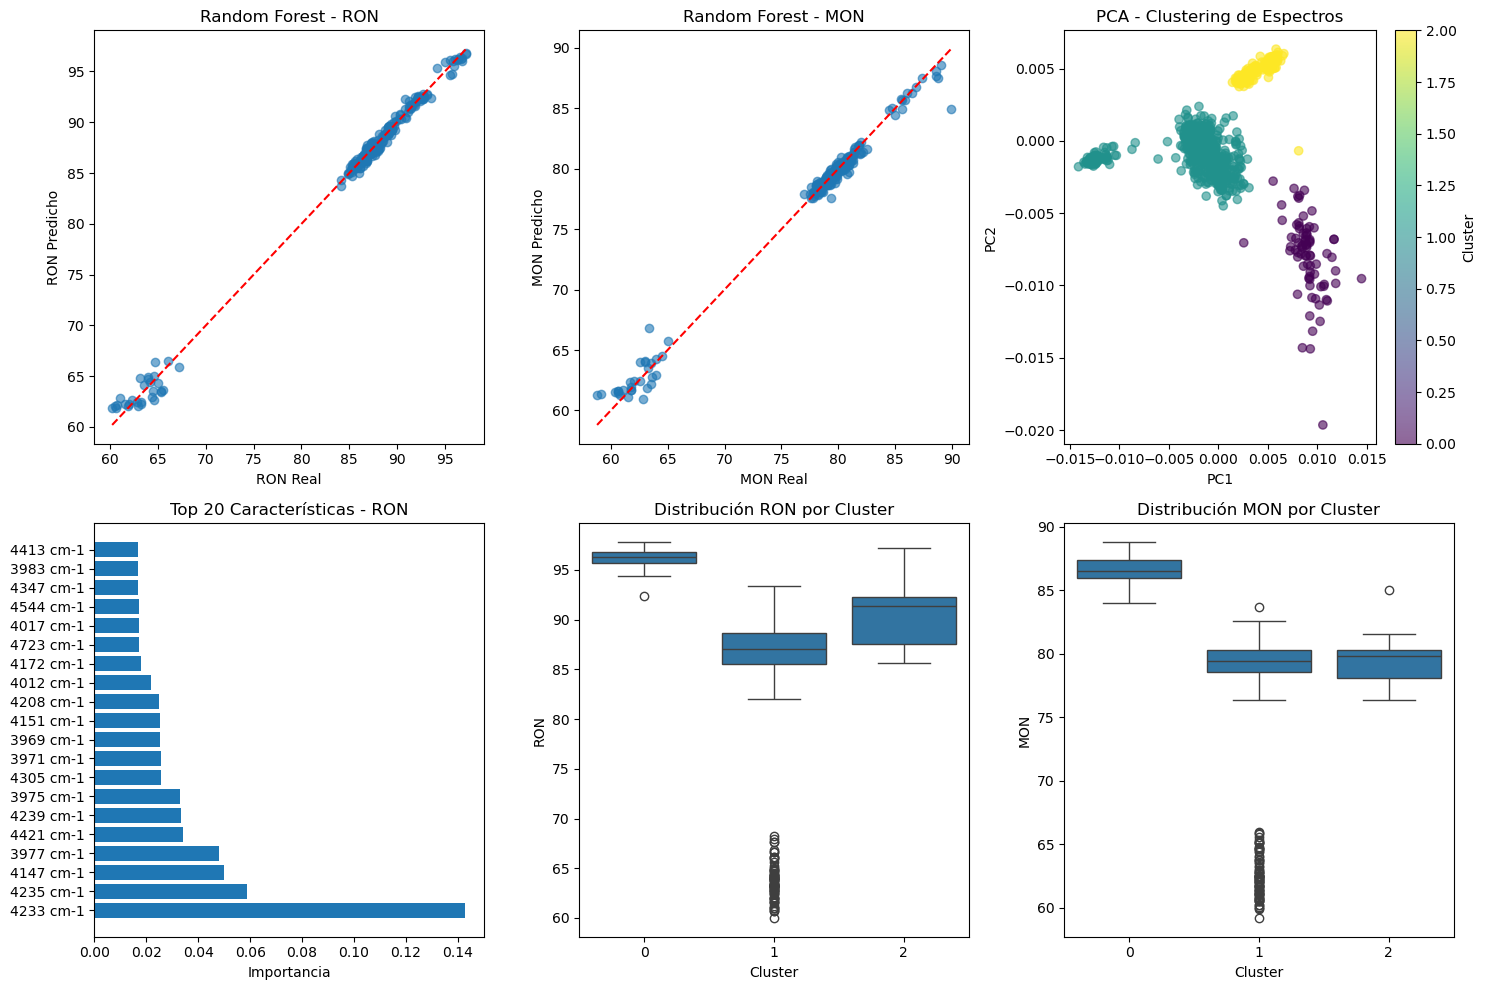

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

# Cargar datos
# df = pd.read_excel('PROYECTO (1).xlsx', sheet_name='Hoja1 (2)')

# Preprocesamiento
# Extraer características espectrales (columnas 2-429)
X = df.iloc[:, 1:429]  # Espectros
y_ron = df.iloc[:, 429]  # RON
y_mon = df.iloc[:, 430]  # MON

# Dividir datos
X_train, X_test, y_ron_train, y_ron_test, y_mon_train, y_mon_test = train_test_split(
    X, y_ron, y_mon, test_size=0.2, random_state=42)

# Escalar características
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Savitzky-Golay secgunda derivada
X_train_scaled = np.apply_along_axis(
    lambda x: savgol_filter(x, window_length=15, polyorder=2, deriv=2),axis=1,arr=X_train.values)
X_test_scaled = np.apply_along_axis(
    lambda x: savgol_filter(x, window_length=15, polyorder=2, deriv=2),axis=1,arr=X_test.values)


# MODELO SUPERVISADO: Random Forest para RON y MON
print("=== MODELO SUPERVISADO ===")

# Modelo para RON
rf_ron = RandomForestRegressor(n_estimators=100, random_state=42)
rf_ron.fit(X_train_scaled, y_ron_train)

# Modelo para MON
rf_mon = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mon.fit(X_train_scaled, y_mon_train)

# Predicciones
y_ron_pred = rf_ron.predict(X_test_scaled)
y_mon_pred = rf_mon.predict(X_test_scaled)

# Evaluación
print(f"RON - RMSE: {np.sqrt(mean_squared_error(y_ron_test, y_ron_pred)):.3f}")
print(f"RON - R²: {r2_score(y_ron_test, y_ron_pred):.3f}")
print(f"MON - RMSE: {np.sqrt(mean_squared_error(y_mon_test, y_mon_pred)):.3f}")
print(f"MON - R²: {r2_score(y_mon_test, y_mon_pred):.3f}")

# MODELO NO SUPERVISADO: PCA + Clustering
print("\n=== MODELO NO SUPERVISADO ===")

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener 95% de varianza
X_pca = pca.fit_transform(X_train_scaled)

print(f"Componentes PCA: {pca.n_components_}")
print(f"Varianza explicada: {np.sum(pca.explained_variance_ratio_):.3f}")

# Clustering con K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Analizar relación clusters vs RON/MON
df_clusters = pd.DataFrame({
    'Cluster': clusters,
    'RON': y_ron_train.values,
    'MON': y_mon_train.values
})

print("\nRelación Clusters - RON/MON:")
cluster_stats = df_clusters.groupby('Cluster').agg({
    'RON': ['mean', 'std'],
    'MON': ['mean', 'std']
})
print(cluster_stats)

# Visualizaciones
plt.figure(figsize=(15, 10))

# 1. Predicciones vs Valores Reales
plt.subplot(2, 3, 1)
plt.scatter(y_ron_test, y_ron_pred, alpha=0.6)
plt.plot([y_ron_test.min(), y_ron_test.max()], [y_ron_test.min(), y_ron_test.max()], 'r--')
plt.xlabel('RON Real')
plt.ylabel('RON Predicho')
plt.title('Random Forest - RON')

plt.subplot(2, 3, 2)
plt.scatter(y_mon_test, y_mon_pred, alpha=0.6)
plt.plot([y_mon_test.min(), y_mon_test.max()], [y_mon_test.min(), y_mon_test.max()], 'r--')
plt.xlabel('MON Real')
plt.ylabel('MON Predicho')
plt.title('Random Forest - MON')

# 2. PCA - Componentes principales
plt.subplot(2, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Clustering de Espectros')
plt.colorbar(label='Cluster')

# 3. Importancia de características (primeras 20)
plt.subplot(2, 3, 4)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_ron.feature_importances_
}).sort_values('importance', ascending=False).head(20)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importancia')
plt.title('Top 20 Características - RON')

# 4. Distribución de RON por cluster
plt.subplot(2, 3, 5)
sns.boxplot(data=df_clusters, x='Cluster', y='RON')
plt.title('Distribución RON por Cluster')

# 5. Distribución de MON por cluster
plt.subplot(2, 3, 6)
sns.boxplot(data=df_clusters, x='Cluster', y='MON')
plt.title('Distribución MON por Cluster')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from scipy.signal import savgol_filter
from joblib import dump
import numpy as np
 
# ---- Definir preprocesamiento único ----
def preproc_fn(X):
    X = np.asarray(X)
    out = []
    for row in X:
        if len(row) >= 15:  # ventana 15, ajusta si usaste otra
            out.append(savgol_filter(row, 15, 3, deriv=2))
        else:
            out.append(row)
    return np.vstack(out)
 
# ---- Crear pipelines (preproc + modelo) ----
pipe_ron = make_pipeline(FunctionTransformer(preproc_fn, validate=False), rf_ron)
pipe_mon = make_pipeline(FunctionTransformer(preproc_fn, validate=False), rf_mon)
 
# ---- Guardarlos ----
dump(pipe_ron, "models/rf_ron_pipeline.joblib")
dump(pipe_mon, "models/rf_mon_pipeline.joblib")
 
print("✅ Pipelines guardados en carpeta 'models/'")

✅ Pipelines guardados en carpeta 'models/'


In [8]:
from joblib import load
modelo = load("models/rf_ron_pipeline.joblib")
print(modelo.named_steps['randomforestregressor'].n_features_in_)

428


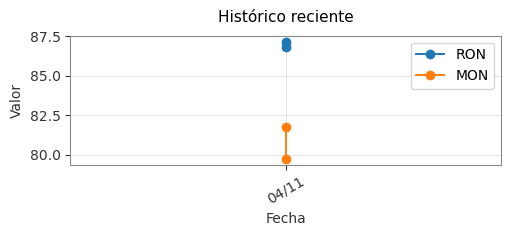

In [143]:
import re, os
import tkinter as tk
from tkinter import filedialog, messagebox
from datetime import datetime
import pandas as pd
from joblib import load
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
 
# ------------------ CONFIGURACIÓN ------------------
MODEL_RON = "Models/rf_ron_pipeline.joblib"
MODEL_MON = "Models/rf_mon_pipeline.joblib"
SPEC_RON_MIN = 84.0
 
# Colores Ecopetrol
BG = "#F4F5F4"      # fondo general suave
CARD_BG = "#FFFFFF" # fondo tarjetas
GREEN = "#184A2C"
FG = "#222"
 
plt.rcParams.update({"axes.edgecolor":"#888","xtick.color":"#333","ytick.color":"#333","axes.labelcolor":"#333"})
 
# ------------------ APP ------------------
root = tk.Tk()
root.title("Inferencia de RON/MON en Gasolinas")
root.configure(bg=BG)
root.geometry("1100x720")
 
# Hacer la grilla responsive (2 columnas x 3 filas)
root.grid_columnconfigure(0, weight=1, uniform="col")
root.grid_columnconfigure(1, weight=1, uniform="col")
root.grid_rowconfigure(1, weight=1, uniform="row")  # fila de tarjetas superiores
root.grid_rowconfigure(2, weight=1, uniform="row")  # fila de tarjetas inferiores
 
# ------------------ ENCABEZADO ------------------
header = tk.Frame(root, bg=BG)
header.grid(row=0, column=0, columnspan=2, sticky="nsew", padx=16, pady=(14,6))
header.grid_columnconfigure(0, weight=1)
title = tk.Label(header, text="DEPARTAMENTO INSPECCIÓN DE CALIDAD\nINFERENCIA DE RON/MON EN GASOLINAS",
                 font=("Arial", 18, "bold"), bg=BG, fg=GREEN, justify="center")
title.grid(row=0, column=0, sticky="n")
 
fecha_lbl = tk.Label(header,
    text=f"Fecha actual: {datetime.now().strftime('%d/%m/%Y')}",
    font=("Arial", 11), bg=BG, fg=FG, anchor="e", justify="right")
fecha_lbl.grid(row=0, column=1, sticky="ne", padx=8)
 
# ------------------ TARJETA MODELO (arriba-izquierda) ------------------
card_model = tk.Frame(root, bg=CARD_BG, bd=1, relief="groove")
card_model.grid(row=1, column=0, sticky="nsew", padx=(16,8), pady=(6,8))
tk.Label(card_model, text="MODELO", font=("Arial", 14, "bold"), bg=CARD_BG, fg=GREEN).pack(anchor="w", padx=14, pady=(12,6))
 
row = tk.Frame(card_model, bg=CARD_BG); row.pack(fill="x", padx=14, pady=2)
tk.Label(row, text="Versión del modelo:", bg=CARD_BG, fg=FG, font=("Arial", 11)).pack(side="left")
tk.Label(row, text="2025.01", bg="#E9ECEF", fg=FG, font=("Arial", 11), padx=8, pady=2).pack(side="left", padx=8)
 
row = tk.Frame(card_model, bg=CARD_BG); row.pack(fill="x", padx=14, pady=2)
tk.Label(row, text="Nombre del modelo:", bg=CARD_BG, fg=FG, font=("Arial", 11)).pack(side="left")
tk.Label(row, text="GMRRONMON", bg="#E9ECEF", fg=FG, font=("Arial", 11), padx=8, pady=2).pack(side="left", padx=8)
 
# Botón para cargar y predecir
btn_predict = tk.Button(card_model, text="Subir Excel y Inferir",
                        bg=GREEN, fg="white", font=("Arial", 12, "bold"), width=22)
btn_predict.pack(pady=14)
 
# ------------------ TARJETA ESPECTRO (arriba-derecha) ------------------
card_spec = tk.Frame(root, bg=CARD_BG, bd=1, relief="groove")
card_spec.grid(row=1, column=1, sticky="nsew", padx=(8,16), pady=(6,8))
tk.Label(card_spec, text="ESPECTRO CARGADO", font=("Arial", 14, "bold"), bg=CARD_BG, fg=GREEN)\
  .pack(anchor="w", padx=14, pady=(12,6))
 
spec_canvas_holder = None  # canvas para el espectro
 
# ------------------ TARJETA RESULTADOS (abajo-izquierda) ------------------
card_res = tk.Frame(root, bg=CARD_BG, bd=1, relief="groove")
card_res.grid(row=2, column=0, sticky="nsew", padx=(16,8), pady=(8,16))
tk.Label(card_res, text="RESULTADOS INFERIDOS", font=("Arial", 14, "bold"), bg=CARD_BG, fg=GREEN)\
  .pack(anchor="w", padx=14, pady=(12,6))
 
res_body = tk.Frame(card_res, bg=CARD_BG); res_body.pack(fill="x", padx=14, pady=6)
lbl_id_title = tk.Label(res_body, text="Identificación de la muestra:", font=("Arial", 11), bg=CARD_BG, fg=FG)
lbl_id_title.grid(row=0, column=0, sticky="w", padx=(0,8), pady=2)
lbl_id_val = tk.Label(res_body, text="--", font=("Arial", 11), bg="#E9ECEF", fg=FG, padx=8, pady=2)
lbl_id_val.grid(row=0, column=1, sticky="w", pady=2)
 
# KPIs RON / MON
kpi = tk.Frame(card_res, bg=CARD_BG); kpi.pack(fill="x", padx=14, pady=(8,2))
lblR = tk.Label(kpi, text="RON\n--", font=("Arial", 18, "bold"), bg="#F8FBFF", fg=FG, bd=1, relief="solid", padx=18, pady=10)
lblR.grid(row=0, column=0, padx=(0,16))
lblM = tk.Label(kpi, text="MON\n--", font=("Arial", 18, "bold"), bg="#FFF8F0", fg=FG, bd=1, relief="solid", padx=18, pady=10)
lblM.grid(row=0, column=1)
 
# Cumplimiento
lblC = tk.Label(card_res, text="Cumple especificación: --", font=("Arial", 12, "bold"), bg=CARD_BG, fg=FG)
lblC.pack(anchor="w", padx=14, pady=(10,12))
 
# ------------------ TARJETA TENDENCIAS (abajo-derecha) ------------------
card_trend = tk.Frame(root, bg=CARD_BG, bd=1, relief="groove")
card_trend.grid(row=2, column=1, sticky="nsew", padx=(8,16), pady=(8,16))
tk.Label(card_trend, text="TENDENCIAS", font=("Arial", 14, "bold"), bg=CARD_BG, fg=GREEN)\
  .pack(anchor="w", padx=14, pady=(12,6))
 
trend_canvas_holder = None
ron_hist, mon_hist, date_hist = [], [], []
 
# ------------------ MODELOS ------------------
try:
    mdl_ron = load(MODEL_RON)
    mdl_mon = load(MODEL_MON)
except Exception as e:
    messagebox.showerror("Modelos", f"No se pudieron cargar:\n{e}")
    root.destroy()
 
# ------------------ UTILIDADES ------------------
def num_from_header(h):
    s = str(h).strip().replace(",", ".")
    m = re.search(r"[-+]?\d+(?:\.\d+)?", s)
    return float(m.group()) if m else None
 
def plot_in_card(frame, x, y, title, invert_x=False):
    """Crea un matplotlib Figure en un frame y devuelve el canvas."""
    plt.close('all')
    fig, ax = plt.subplots(figsize=(6.6, 3.1))
    ax.plot(x, y, linewidth=1.4, color=GREEN)
    ax.set_xlabel("Número de onda (cm⁻¹)")
    ax.set_ylabel("Absorbancia")
    ax.set_title(title, fontsize=11, pad=10)
    ax.grid(True, alpha=0.3)
    if invert_x:
        ax.invert_xaxis()
    plt.subplots_adjust(bottom=0.22)
    fig.tight_layout(pad=1.6)
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.get_tk_widget().pack(fill="both", expand=True, padx=12, pady=(0,12))
    canvas.draw()
    return canvas
 
def plot_trends():
    global trend_canvas_holder
    if trend_canvas_holder:
        trend_canvas_holder.get_tk_widget().destroy()
        trend_canvas_holder = None
    if not ron_hist:
        return
    plt.close('all')
    fig, ax = plt.subplots(figsize=(6.6, 3.1))
    ax.plot(date_hist, ron_hist, marker="o", linewidth=1.4, label="RON")
    ax.plot(date_hist, mon_hist, marker="o", linewidth=1.4, label="MON")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.set_title("Histórico reciente", fontsize=11, pad=10)
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.xticks(rotation=30)
    plt.subplots_adjust(bottom=0.30)
    fig.tight_layout(pad=1.6)
    trend_canvas_holder = FigureCanvasTkAgg(fig, master=card_trend)
    trend_canvas_holder.get_tk_widget().pack(fill="both", expand=True, padx=12, pady=(0,12))
    trend_canvas_holder.draw()
 
# ------------------ PREDICCIÓN ------------------
def predecir():
    global spec_canvas_holder
    p = filedialog.askopenfilename(title="Seleccionar archivo Excel",
                                   filetypes=[("Excel", "*.xlsx;*.xls")])
    if not p: return
    try:
        df0 = pd.read_excel(p)
        if df0.shape[1] < 2:
            raise ValueError("El archivo debe tener una columna ID y al menos una columna de espectro.")
 
        # ID muestra
        nombre_archivo = os.path.basename(p)
        lbl_id_val.config(text=nombre_archivo)
 
        # quitar ID y limpiar encabezados (e.g., '3931 cm-1' -> 3931.0)
        df = df0.iloc[:, 1:]
        #df = df0.copy()
        headers = [num_from_header(c) for c in df.columns]
        keep = [i for i, x in enumerate(headers) if x is not None]
        df = df.iloc[:, keep]
        headers = [headers[i] for i in keep]
 
        # ordenar por número de onda y recortar a n_features
        order = sorted(range(len(headers)), key=lambda i: headers[i])
        df = df.iloc[:, order]
        headers = [headers[i] for i in order]
        n = getattr(mdl_ron, "n_features_in_", 428)
        if df.shape[1] > n:
            df = df.iloc[:, :n]
            headers = headers[:n]
 
        # ---- Predicciones (primera fila) ----
        ron = float(mdl_ron.predict(df)[0])
        mon = float(mdl_mon.predict(df)[0])
 
        # Mostrar KPIs y Cumplimiento
        if ron >= SPEC_RON_MIN:
            lblR.config(text=f"RON\n{ron:.1f}", fg=GREEN, bg="#F1FAF3")
            lblC.config(text="Cumple especificación: SÍ ✅", fg=GREEN)
        else:
            lblR.config(text=f"RON\n{ron:.1f}", fg="red", bg="#FFF5F5")
            lblC.config(text="Cumple especificación: NO ❌", fg="red")
        lblM.config(text=f"MON\n{mon:.1f}", fg=GREEN)
 
        # ---- Espectro en tarjeta derecha ----
        if spec_canvas_holder:
            spec_canvas_holder.get_tk_widget().destroy()
            spec_canvas_holder = None
        nombre_archivo = os.path.basename(p)
        spec_canvas_holder = plot_in_card(card_spec, headers, df.iloc[0, :],
                                          title=nombre_archivo, invert_x=False)
 
        # ---- Tendencias (acumula en memoria de la app) ----
        ron_hist.append(ron); mon_hist.append(mon)
        date_hist.append(datetime.now().strftime("%d/%m"))
        if len(ron_hist) > 30:  # conserva últimos 30
            ron_hist.pop(0); mon_hist.pop(0); date_hist.pop(0)
        plot_trends()
 
        # Actualiza fecha del encabezado
        fecha_lbl.config(text=f"Fecha actual: {datetime.now().strftime('%d/%m/%Y %H:%M')}")
 
    except Exception as e:
        messagebox.showerror("Predicción", str(e))
 
btn_predict.config(command=predecir)
 
# ------------------ RUN ------------------
root.mainloop()
 